In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
import seaborn as sns 


Reading Data 

In [14]:
df1 = pd.read_csv('2017_UA.csv')
df2 = pd.read_csv('2018_UA.csv')

In [15]:
print(df1.columns)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')


In [16]:
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])
df2['FL_DATE'] = pd.to_datetime(df2['FL_DATE'])

In [17]:
df = pd.concat([df1, df2])

# Display

### Red: Column used in labels

### Blue: Column not used

In [18]:
df.head(5).style.set_table_styles({
    'OP_CARRIER': [{'selector': '', 'props': [('color', '#4FC0D0')]}],
    'Unnamed: 27': [{'selector': '', 'props': [('color', '#4FC0D0')]}],
    'ARR_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'LATE_AIRCRAFT_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'CARRIER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'WEATHER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'NAS_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'SECURITY_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
 }, overwrite=False)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01 00:00:00,UA,3,IAH,FLL,2000,2002.000000,2.000000,11.000000,2013.000000,2309.000000,3.000000,2324,2312.000000,-12.000000,0.000000,nan,0.000000,144.000000,130.000000,116.000000,966.000000,nan,nan,nan,nan,nan,nan
1,2017-01-01 00:00:00,UA,10,BNA,IAH,540,542.000000,2.000000,13.000000,555.000000,752.000000,5.000000,806,757.000000,-9.000000,0.000000,nan,0.000000,146.000000,135.000000,117.000000,657.000000,nan,nan,nan,nan,nan,nan
2,2017-01-01 00:00:00,UA,12,DEN,LAX,1905,1922.000000,17.000000,16.000000,1938.000000,2052.000000,8.000000,2035,2100.000000,25.000000,0.000000,nan,0.000000,150.000000,158.000000,134.000000,862.000000,17.000000,0.000000,8.000000,0.000000,0.000000,nan
3,2017-01-01 00:00:00,UA,14,HNL,EWR,1620,1625.000000,5.000000,16.000000,1641.000000,624.000000,19.000000,649,643.000000,-6.000000,0.000000,nan,0.000000,569.000000,558.000000,523.000000,4962.000000,nan,nan,nan,nan,nan,nan
4,2017-01-01 00:00:00,UA,15,EWR,HNL,845,914.000000,29.000000,21.000000,935.000000,1533.000000,6.000000,1511,1539.000000,28.000000,0.000000,nan,0.000000,686.000000,685.000000,658.000000,4962.000000,28.000000,0.000000,0.000000,0.000000,0.000000,nan


In [19]:
df = df.drop(['OP_CARRIER', 'Unnamed: 27'], axis=1)
df1.head(5).style.set_table_styles({
    'ARR_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'LATE_AIRCRAFT_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'CARRIER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'WEATHER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'NAS_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'SECURITY_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
 }, overwrite=False)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01 00:00:00,UA,3,IAH,FLL,2000,2002.000000,2.000000,11.000000,2013.000000,2309.000000,3.000000,2324,2312.000000,-12.000000,0.000000,nan,0.000000,144.000000,130.000000,116.000000,966.000000,nan,nan,nan,nan,nan,nan
1,2017-01-01 00:00:00,UA,10,BNA,IAH,540,542.000000,2.000000,13.000000,555.000000,752.000000,5.000000,806,757.000000,-9.000000,0.000000,nan,0.000000,146.000000,135.000000,117.000000,657.000000,nan,nan,nan,nan,nan,nan
2,2017-01-01 00:00:00,UA,12,DEN,LAX,1905,1922.000000,17.000000,16.000000,1938.000000,2052.000000,8.000000,2035,2100.000000,25.000000,0.000000,nan,0.000000,150.000000,158.000000,134.000000,862.000000,17.000000,0.000000,8.000000,0.000000,0.000000,nan
3,2017-01-01 00:00:00,UA,14,HNL,EWR,1620,1625.000000,5.000000,16.000000,1641.000000,624.000000,19.000000,649,643.000000,-6.000000,0.000000,nan,0.000000,569.000000,558.000000,523.000000,4962.000000,nan,nan,nan,nan,nan,nan
4,2017-01-01 00:00:00,UA,15,EWR,HNL,845,914.000000,29.000000,21.000000,935.000000,1533.000000,6.000000,1511,1539.000000,28.000000,0.000000,nan,0.000000,686.000000,685.000000,658.000000,4962.000000,28.000000,0.000000,0.000000,0.000000,0.000000,nan


In [20]:
df.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
dtype: objec

In [21]:
df.isna().sum()

FL_DATE                      0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 10486
DEP_DELAY                10486
TAXI_OUT                 10830
WHEELS_OFF               10830
WHEELS_ON                11164
TAXI_IN                  11164
CRS_ARR_TIME                 0
ARR_TIME                 11164
ARR_DELAY                13919
CANCELLED                    0
CANCELLATION_CODE      1195184
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      13919
AIR_TIME                 13919
DISTANCE                     0
CARRIER_DELAY           988823
WEATHER_DELAY           988823
NAS_DELAY               988823
SECURITY_DELAY          988823
LATE_AIRCRAFT_DELAY     988823
dtype: int64

In [8]:
df = pd.concat([df1, df2, df_2011, df_2009, df_2010, df_2011,df_2012, df_2013, df_2014, df_2015, df_2016])

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,OP_CARRIER
0,2017-10-12 00:00:00,1108,ORD,SEA,746.0,739.0,-7.0,22.0,801.0,1008.0,11.0,1019.0,1019.0,0.0,0.0,NaN,0.0,273.0,280.0,247.0,1721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-14 00:00:00,673,BNA,IAD,1847.0,1841.0,-6.0,19.0,1900.0,2113.0,6.0,2118.0,2119.0,1.0,0.0,NaN,0.0,91.0,98.0,73.0,542.0,NaN,NaN,NaN,NaN,NaN,NaN,UA
2,2012-04-04,1244,EWR,TPA,1759.0,1810.0,11.0,56.0,1906.0,2136.0,6.0,2059.0,2142.0,43.0,0.0,0,0.0,180.0,212.0,150.0,997.0,11.0,0.0,32.0,0.0,0.0,NaN,NaN
3,2017-08-24 00:00:00,1165,EWR,LAX,1420.0,1419.0,-1.0,24.0,1443.0,1712.0,6.0,1725.0,1718.0,-7.0,0.0,NaN,0.0,365.0,359.0,329.0,2454.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-15 00:00:00,2051,TPA,SFO,847.0,837.0,-10.0,12.0,849.0,1109.0,26.0,1147.0,1135.0,-12.0,0.0,NaN,0.0,360.0,358.0,320.0,2393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943286,2010-06-12,576,DEN,ORD,1453.0,1621.0,88.0,14.0,1635.0,1918.0,23.0,1822.0,1941.0,79.0,0.0,0,0.0,149.0,140.0,103.0,888.0,0.0,0.0,79.0,0.0,0.0,NaN,NaN
1943287,2015-07-14,243,DEN,GRR,1941.0,2102.0,81.0,28.0,2130.0,133.0,4.0,15.0,137.0,82.0,0.0,0,0.0,154.0,155.0,123.0,1015.0,0.0,0.0,1.0,0.0,81.0,NaN,NaN
1943288,2011-01-30,599,MDT,ORD,740.0,739.0,-1.0,23.0,802.0,850.0,9.0,839.0,859.0,20.0,0.0,0,0.0,119.0,140.0,108.0,594.0,0.0,0.0,20.0,0.0,0.0,NaN,NaN
1943289,2017-03-23 00:00:00,319,IAD,LAX,630.0,632.0,2.0,15.0,647.0,900.0,41.0,917.0,941.0,24.0,0.0,NaN,0.0,347.0,369.0,313.0,2288.0,0.0,0.0,24.0,0.0,0.0,NaN,NaN


In [10]:
# #DEP_TIME, DEP_DELAY, TAXI_OUT , WHEELS_OFF , WHEELS_ON , TAXI_IN , ARR_TIME, ARR_DELAY, CANCELLATION_CODE, ACTUAL_ELAPSED_TIME, AIR_TIME, CARRIER_DELAY , WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY\
# cancelled.head(5).style.set_table_styles({
#     'DEP_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'DEP_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'TAXI_OUT': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'WHEELS_OFF': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'WHEELS_ON': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'TAXI_IN': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'ARR_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'ARR_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'CANCELLATION_CODE': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'ACTUAL_ELAPSED_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'AIR_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'WEATHER_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'SECURITY_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
#     'LATE_AIRCRAFT_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}]
#  }, overwrite=False)

In [11]:
df = df.fillna(0)

In [18]:
df.shape    

(1943291, 28)

In [12]:
use_cols = ['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df = df[use_cols].copy()

In [17]:
df.describe()

,FL_DATE,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1206046,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06,1.206046e+06
mean,2018-01-10 20:26:00.489732608,1.155167e+03,1.317313e+03,1.307828e+03,9.696604e+00,1.888160e+01,1.328580e+03,1.440449e+03,7.808065e+00,1.479788e+03,1.444083e+03,3.770686e+00,9.006290e-03,2.534729e-03,1.875385e+02,1.795492e+02,1.529372e+02,1.185127e+03,2.973042e+00,6.354957e-01,4.080160e+00,6.998075e-04,4.816066e+00
min,2017-01-01 00:00:00,3.000000e+00,1.000000e+00,0.000000e+00,-1.220000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.200000e+02,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,6.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-07-14 00:00:00,5.360000e+02,8.580000e+02,8.500000e+02,-6.000000e+00,1.300000e+01,9.040000e+02,1.027000e+03,4.000000e+00,1.054000e+03,1.030000e+03,-1.700000e+01,0.000000e+00,0.000000e+00,1.230000e+02,1.150000e+02,8.900000e+01,6.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2018-01-12 00:00:00,1.115000e+03,1.302000e+03,1.304000e+03,-3.000000e+00,1.600000e+01,1.319000e+03,1.503000e+03,6.000000e+00,1.520000e+03,1.505000e+03,-8.000000e+00,0.000000e+00,0.000000e+00,1.650000e+02,1.590000e+02,1.320000e+02,9.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2018-07-15 00:00:00,1.787000e+03,1.740000e+03,1.743000e+03,4.000000e+00,2.200000e+01,1.758000e+03,1.924000e+03,9.000000e+00,1.933000e+03,1.928000e+03,6.000000e+00,0.000000e+00,0.000000e+00,2.430000e+02,2.350000e+02,2.070000e+02,1.620000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2018-12-31 00:00:00,2.833000e+03,2.359000e+03,2.359000e+03,1.553000e+03,1.960000e+02,2.359000e+03,2.359000e+03,3.290000e+02,2.359000e+03,2.359000e+03,1.539000e+03,1.000000e+00,1.000000e+00,6.880000e+02,7.570000e+02,6.960000e+02,4.963000e+03,1.457000e+03,1.352000e+03,1.373000e+03,2.320000e+02,1.509000e+03
std,NaN,6.701302e+02,5.049766e+02,5.305153e+02,4.620567e+01,1.032923e+01,5.352360e+02,5.740640e+02,6.008272e+00,5.444715e+02,5.786720e+02,4.840033e+01,9.447319e-02,5.028227e-02,8.786773e+01,8.954284e+01,8.721885e+01,7.398828e+02,2.377118e+01,1.255751e+01,1.941363e+01,2.735220e-01,2.660186e+01


In [18]:
cancelled = df[df['CANCELLED']==1]
cancelled.tail()

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
617516,2018-12-29,1482,STT,EWR,1525,1505.0,-20.0,0.0,0.0,0.0,0.0,1850,0.0,0.0,1.0,A,0.0,265.0,0.0,0.0,1634.0,0.0,0.0,0.0,0.0,0.0
620097,2018-12-31,2407,EGE,IAD,1600,0.0,0.0,0.0,0.0,0.0,0.0,2119,0.0,0.0,1.0,B,0.0,199.0,0.0,0.0,1573.0,0.0,0.0,0.0,0.0,0.0
620929,2018-12-31,992,EGE,ORD,1630,0.0,0.0,0.0,0.0,0.0,0.0,2010,0.0,0.0,1.0,B,0.0,160.0,0.0,0.0,1007.0,0.0,0.0,0.0,0.0,0.0
621173,2018-12-31,593,MTJ,EWR,1536,0.0,0.0,0.0,0.0,0.0,0.0,2148,0.0,0.0,1.0,B,0.0,252.0,0.0,0.0,1795.0,0.0,0.0,0.0,0.0,0.0
621513,2018-12-31,243,EGE,ORD,1327,0.0,0.0,0.0,0.0,0.0,0.0,1707,0.0,0.0,1.0,B,0.0,160.0,0.0,0.0,1007.0,0.0,0.0,0.0,0.0,0.0


In [19]:
days_month_cancelled = pd.DataFrame()
days_month_cancelled['FL_DATE'] = cancelled['FL_DATE']
days_month_cancelled['day'] = days_month_cancelled['FL_DATE'].dt.day_name()
days_month_cancelled['month'] = days_month_cancelled['FL_DATE'].dt.month

In [20]:
days_month_cancelled['day'].value_counts()
#perc_days_cancelled.groupby('day').count()

day
Tuesday      2015
Wednesday    1904
Thursday     1781
Monday       1763
Friday       1301
Sunday       1197
Saturday      901
Name: count, dtype: int64

In [21]:
days_month_total = pd.DataFrame()
days_month_total['FL_DATE'] = df['FL_DATE']
days_month_total['day'] = days_month_total['FL_DATE'].dt.day_name()
days_month_total['month'] = days_month_total['FL_DATE'].dt.month
days_month_total.reset_index(drop=True)

,FL_DATE,day,month
0,2017-01-01,Sunday,1
1,2017-01-01,Sunday,1
2,2017-01-01,Sunday,1
3,2017-01-01,Sunday,1
4,2017-01-01,Sunday,1
...,...,...,...
1206041,2018-12-31,Monday,12
1206042,2018-12-31,Monday,12
1206043,2018-12-31,Monday,12
1206044,2018-12-31,Monday,12


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

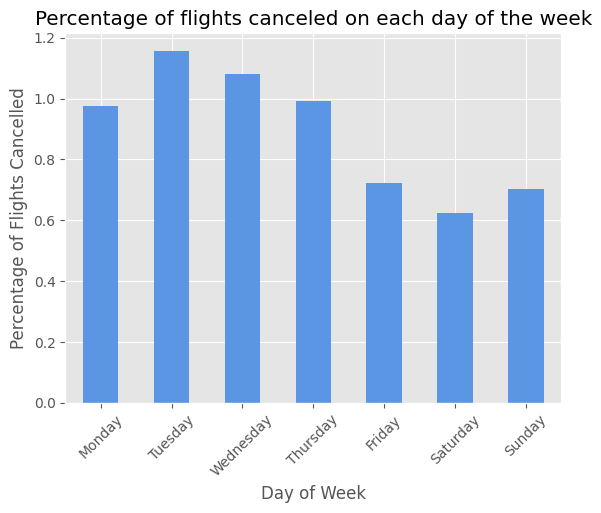

In [22]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_frac  = (days_month_cancelled['day'].value_counts()/ days_month_total['day'].value_counts())*100
days_frac = days_frac.reindex(day_order)

ax = days_frac.plot(kind='bar', title='Percentage of flights canceled on each day of the week', color='#5A96E3', ylabel='Percentage of Flights Cancelled', xlabel='Day of Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

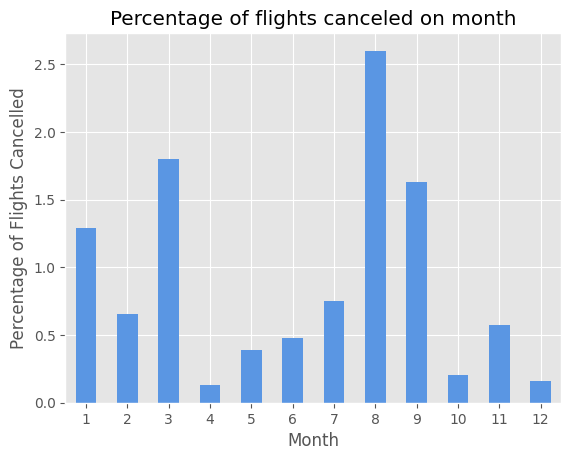

In [23]:
month_frac  = (days_month_cancelled['month'].value_counts()/ days_month_total['month'].value_counts())*100

ax = month_frac.plot(kind='bar', title='Percentage of flights canceled on month', color='#5A96E3', ylabel='Percentage of Flights Cancelled', xlabel='Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

In [24]:
perc_dayofweek_month = (days_month_cancelled[['day', 'month']].value_counts()/days_month_total[['day', 'month']].value_counts())*100
perc_df = perc_dayofweek_month.reset_index(name='perc_dayofweek_month')
perc_df

,day,month,perc_dayofweek_month
0,Friday,1,1.198842
1,Friday,2,0.472378
2,Friday,3,0.911616
3,Friday,4,0.089206
4,Friday,5,0.202693
...,...,...,...
79,Wednesday,8,2.926725
80,Wednesday,9,0.258788
81,Wednesday,10,0.165048
82,Wednesday,11,0.044906


/tmp/ipykernel_688/708233541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_daysofweek_month['dayofweek'] = plot_daysofweek_month['day'].map(day_map)


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

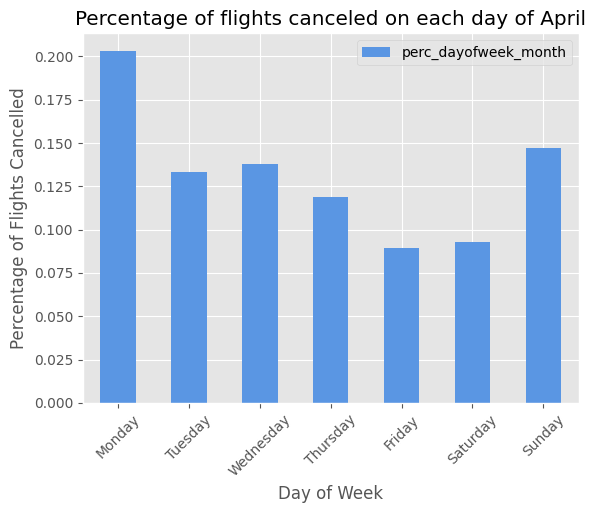

In [25]:
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
plot_daysofweek_month = perc_df[perc_df['month'] == 4]
plot_daysofweek_month['dayofweek'] = plot_daysofweek_month['day'].map(day_map)
plot_daysofweek_month = plot_daysofweek_month.sort_values(by='dayofweek')
plot_daysofweek_month

ax = plot_daysofweek_month.plot(kind='bar', title='Percentage of flights canceled on each day of April', color='#5A96E3', ylabel='Percentage of Flights Cancelled', xlabel='Day of Week', x='day', y='perc_dayofweek_month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

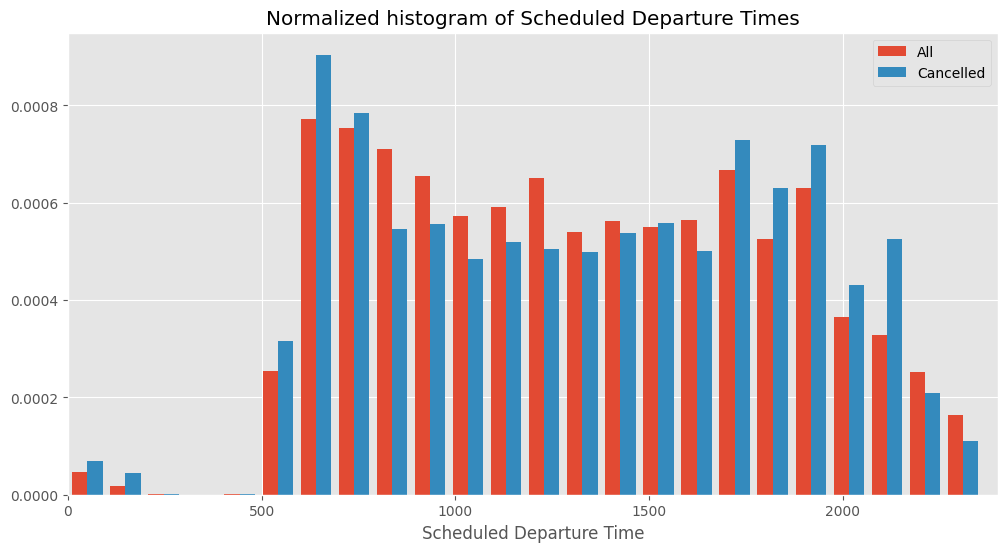

In [26]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']], density=True, bins=24, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()


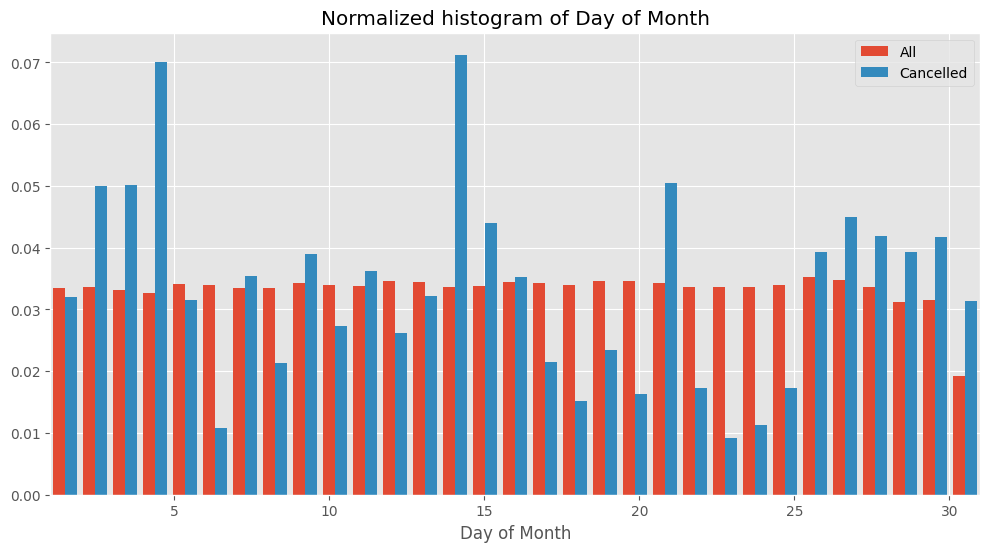

In [27]:

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['FL_DATE'].dt.day, cancelled['FL_DATE'].dt.day], density=True, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(1,31)
ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()


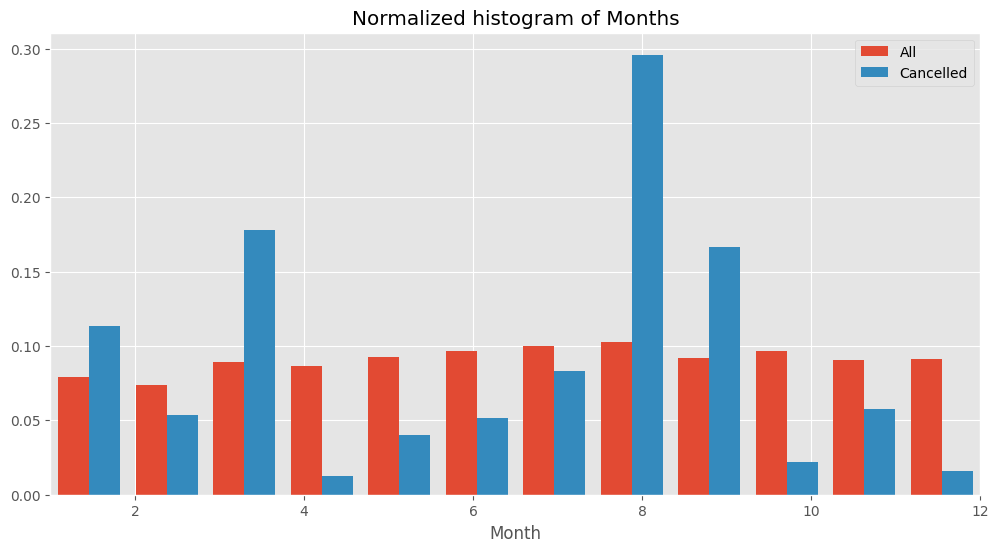

In [28]:

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['FL_DATE'].dt.month, cancelled['FL_DATE'].dt.month], density=True, bins=12, label=['All', 'Cancelled'])

ax.set_xlim(1,12)
ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')

plt.legend()
plt.show()


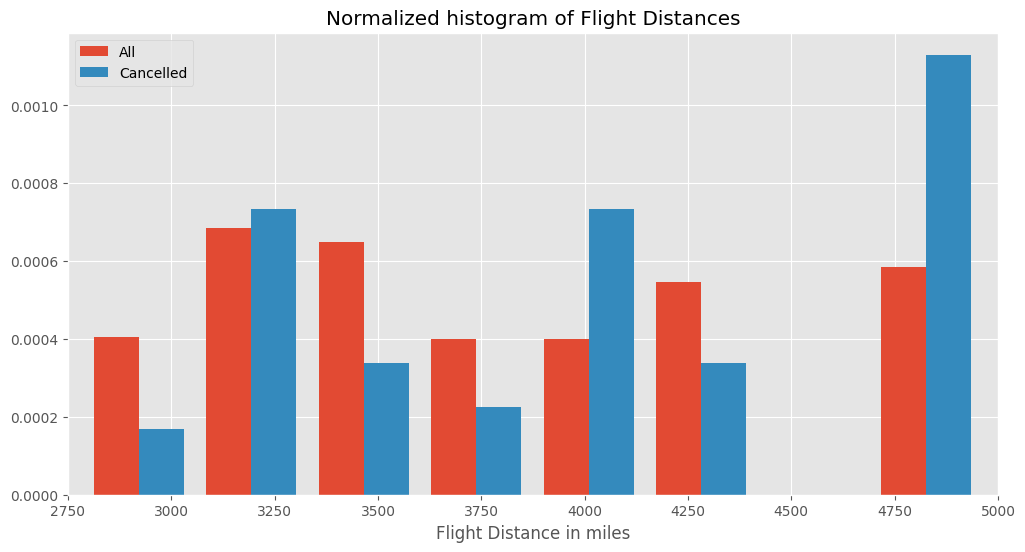

In [29]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df[df['DISTANCE'] > 2750]['DISTANCE'], cancelled[cancelled['DISTANCE'] > 2750]['DISTANCE']], density=True, bins=8, label=['All', 'Cancelled'])

ax.set_xlim(2750, 5000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()


In [30]:
df[df['TAXI_OUT'].isna() == True].reset_index()

,index,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


In [31]:
cancelled.reset_index(drop=True)

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-01-02,325,IAD,LAX,1715,0.0,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,1.0,A,0.0,332.0,0.0,0.0,2288.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-02,408,SFO,IAD,730,0.0,0.0,0.0,0.0,0.0,0.0,1519,0.0,0.0,1.0,A,0.0,289.0,0.0,0.0,2419.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-02,1125,IAH,EWR,1555,0.0,0.0,0.0,0.0,0.0,0.0,2020,0.0,0.0,1.0,A,0.0,205.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-02,1803,SJU,EWR,158,0.0,0.0,0.0,0.0,0.0,0.0,503,0.0,0.0,1.0,A,0.0,245.0,0.0,0.0,1608.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-02,1844,SFO,ATL,2255,3.0,68.0,0.0,0.0,0.0,0.0,633,0.0,0.0,1.0,A,0.0,278.0,0.0,0.0,2139.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857,2018-12-29,1482,STT,EWR,1525,1505.0,-20.0,0.0,0.0,0.0,0.0,1850,0.0,0.0,1.0,A,0.0,265.0,0.0,0.0,1634.0,0.0,0.0,0.0,0.0,0.0
10858,2018-12-31,2407,EGE,IAD,1600,0.0,0.0,0.0,0.0,0.0,0.0,2119,0.0,0.0,1.0,B,0.0,199.0,0.0,0.0,1573.0,0.0,0.0,0.0,0.0,0.0
10859,2018-12-31,992,EGE,ORD,1630,0.0,0.0,0.0,0.0,0.0,0.0,2010,0.0,0.0,1.0,B,0.0,160.0,0.0,0.0,1007.0,0.0,0.0,0.0,0.0,0.0
10860,2018-12-31,593,MTJ,EWR,1536,0.0,0.0,0.0,0.0,0.0,0.0,2148,0.0,0.0,1.0,B,0.0,252.0,0.0,0.0,1795.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.loc[df.duplicated(subset=['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST'])]

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


1.3 Histogram of Taxi-Out times
We can see here that many flights are cancelled before the plane has a chance to taxi-out to the runway.

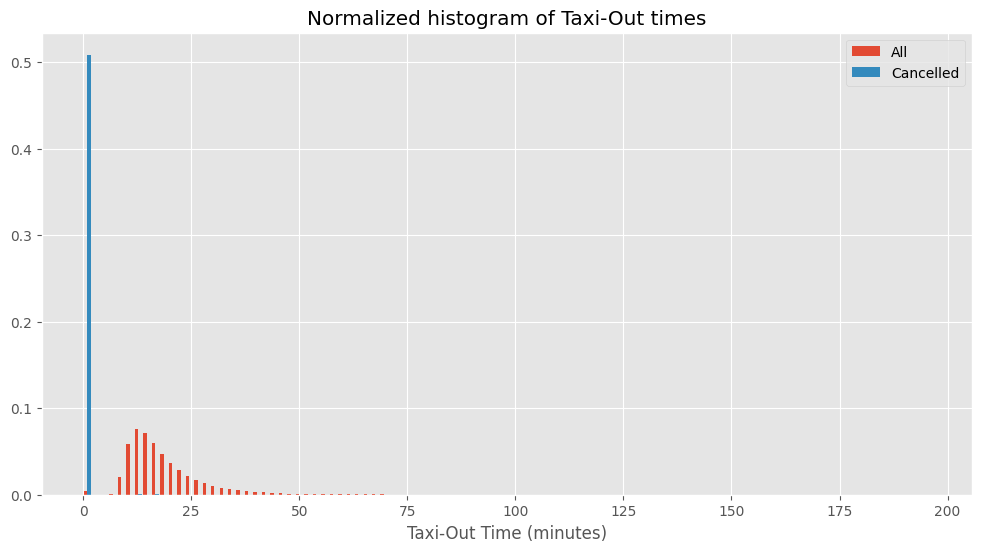

In [33]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['TAXI_OUT'], cancelled['TAXI_OUT']], density=True, bins=100, label=['All', 'Cancelled'])

ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()


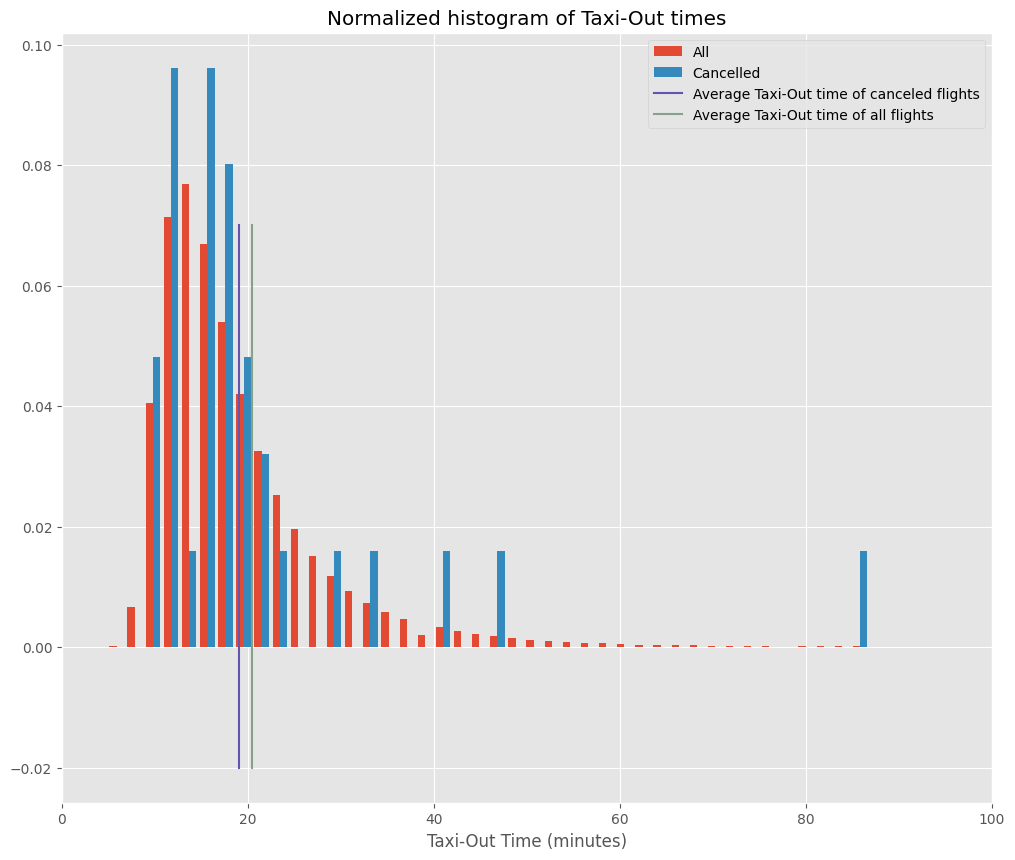

In [34]:
fig, ax = plt.subplots(figsize = (12,10))
x = df['TAXI_OUT'][df['TAXI_OUT'] > 0]
y = cancelled['TAXI_OUT'][cancelled['TAXI_OUT'] > 0]
x_mean = np.mean(x)
y_mean = np.mean(y)

ax.hist([x, y], density=True, bins=100, label=['All', 'Cancelled'])
ax.plot([x_mean, x_mean],[-0.02,0.07],color='#6554AF', label='Average Taxi-Out time of canceled flights')
ax.plot([y_mean, y_mean],[-0.02,0.07],color='#85A389', label='Average Taxi-Out time of all flights')

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()


In [35]:
df.head(1)

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-01-01,3,IAH,FLL,2000,2002.0,2.0,11.0,2013.0,2309.0,3.0,2324,2312.0,-12.0,0.0,0,0.0,144.0,130.0,116.0,966.0,0.0,0.0,0.0,0.0,0.0


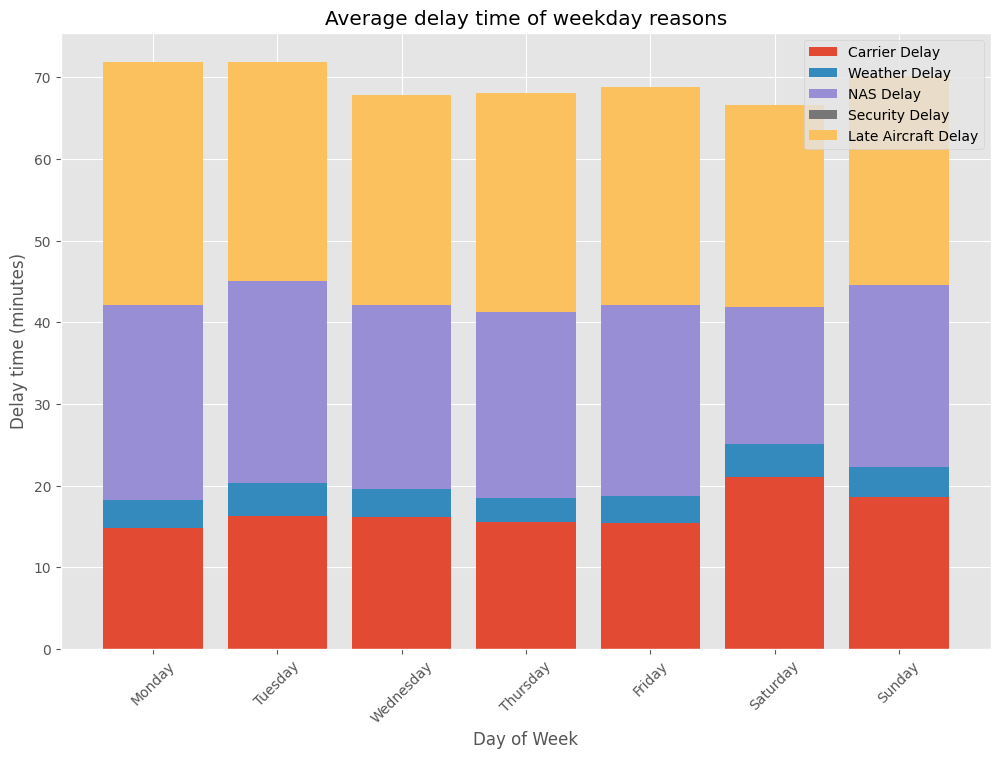

In [36]:
df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])
df_delayed = df[df['total_delay'] != 0]
carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

day_map = {0: 'Monday', 1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday', 5: 'Saturday', 6:'Sunday'}
x = carrier_group.index.map(day_map)

fig, ax = plt.subplots(figsize = (12,8))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Delay time (minutes)')
ax.set_title('Average delay time of weekday reasons')

plt.legend()
plt.show()

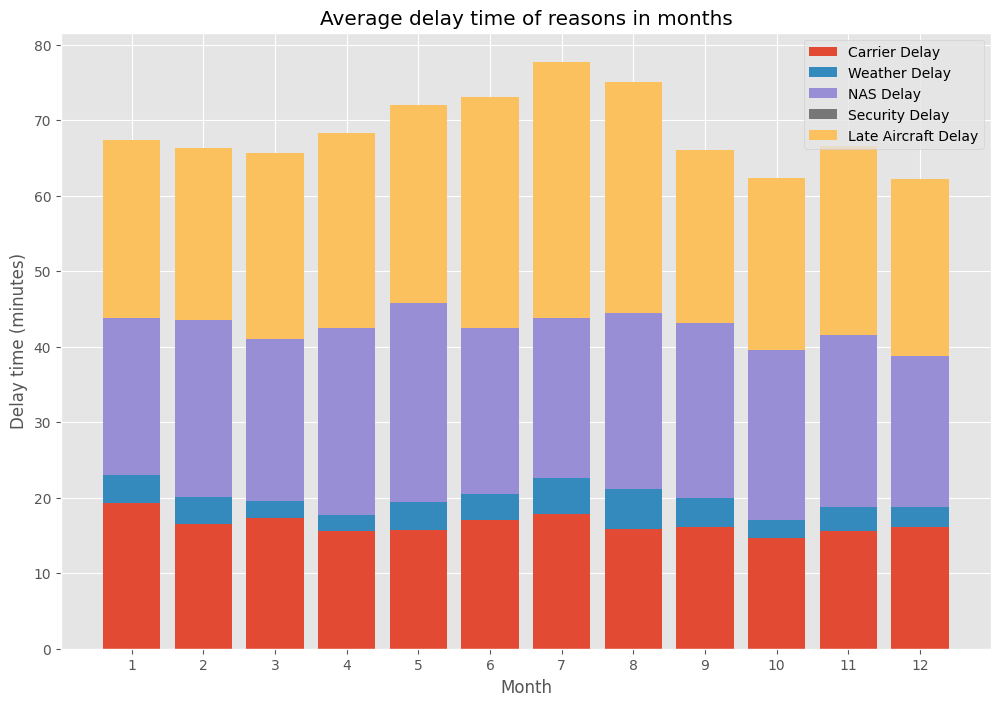

In [37]:
df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])
df_delayed = df[df['total_delay'] != 0]
carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,8))

ax.set_xticks(np.arange(1, len(x) + 1))
ax.bar(np.arange(1, len(x)+1),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(1, len(x)+1),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(1, len(x)+1),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(1, len(x)+1),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(1, len(x)+1),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Month')
ax.set_ylabel('Delay time (minutes)')
ax.set_title('Average delay time of reasons in months')
plt.legend()
plt.show()

In [38]:
carrier_group.values

array([19.36847078, 16.47991123, 17.37081074, 15.64862162, 15.78220141,
       17.02689476, 17.88459959, 15.91693623, 16.15491904, 14.67912088,
       15.58502273, 16.08998895])

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

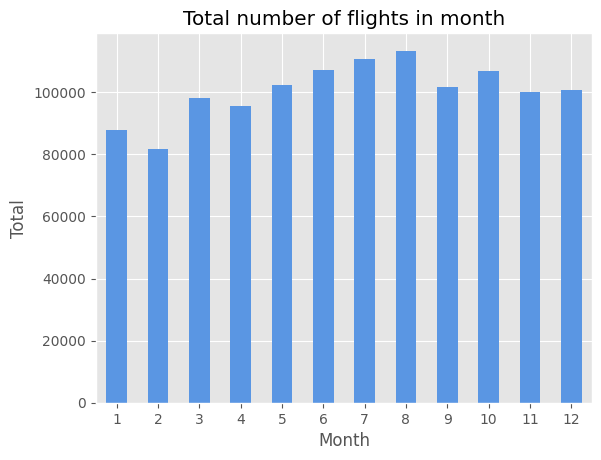

In [39]:
ax = df['FL_DATE'].dt.month.value_counts().sort_index().plot(kind='bar', title='Total number of flights in month', color='#5A96E3', ylabel='Total', xlabel='Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

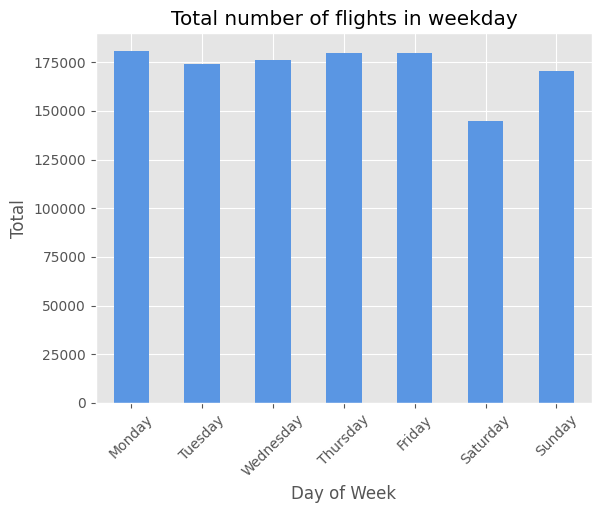

In [40]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df['FL_DATE'].dt.weekday.value_counts().sort_index().plot(kind='bar', title='Total number of flights in weekday', color='#5A96E3', ylabel='Total', xlabel='Day of Week')
ax.set_xticklabels(day, rotation=45)

In [41]:
ax = df['FL_DATE'].dt.dayofweek.value_counts().sort_index()
ax

FL_DATE
0    180834
1    174170
2    176348
3    179762
4    179912
5    144684
6    170336
Name: count, dtype: int64

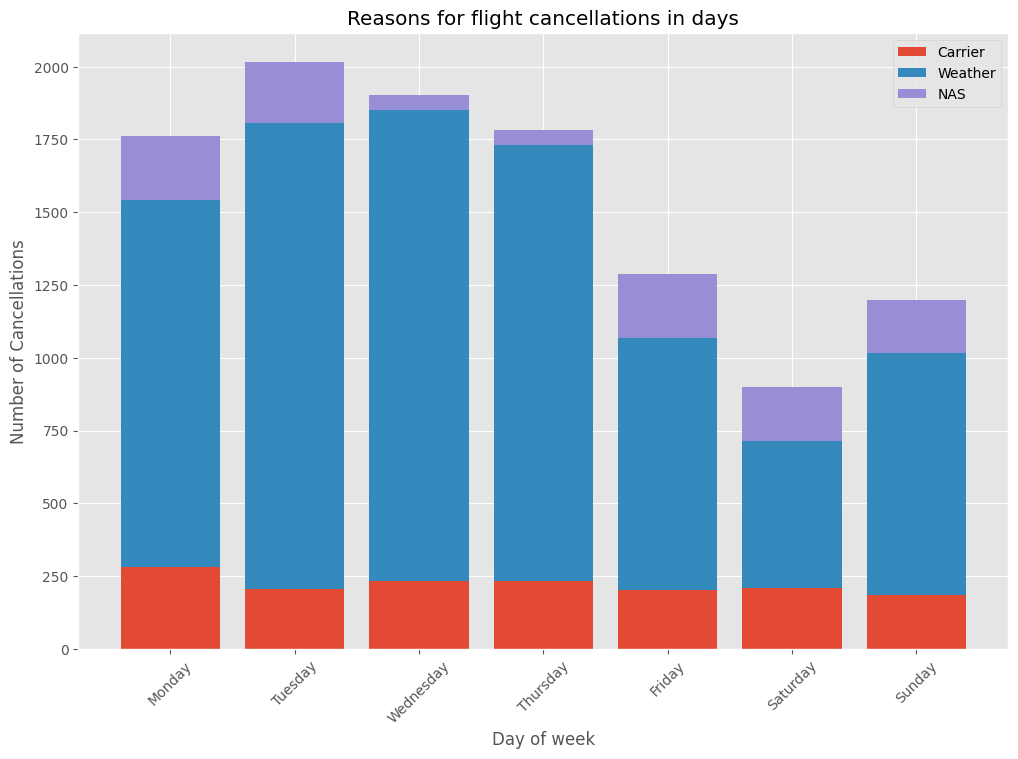

In [42]:
cancelled_group = cancelled['CANCELLATION_CODE'].groupby(cancelled['FL_DATE'].dt.weekday).value_counts().sort_index()

b_bottom = cancelled_group.loc[:,'A'].values
c_bottom = b_bottom + cancelled_group.loc[:,'B'].values
d_bottom = c_bottom + cancelled_group.loc[:,'B'].values

day_map = {0: 'Monday', 1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday', 5: 'Saturday', 6:'Sunday'}
x = cancelled_group.loc[:,'A'].index.map(day_map)

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)

ax.bar(np.arange(len(x)),cancelled_group.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Day of week')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Reasons for flight cancellations in days')
plt.legend()
plt.show()


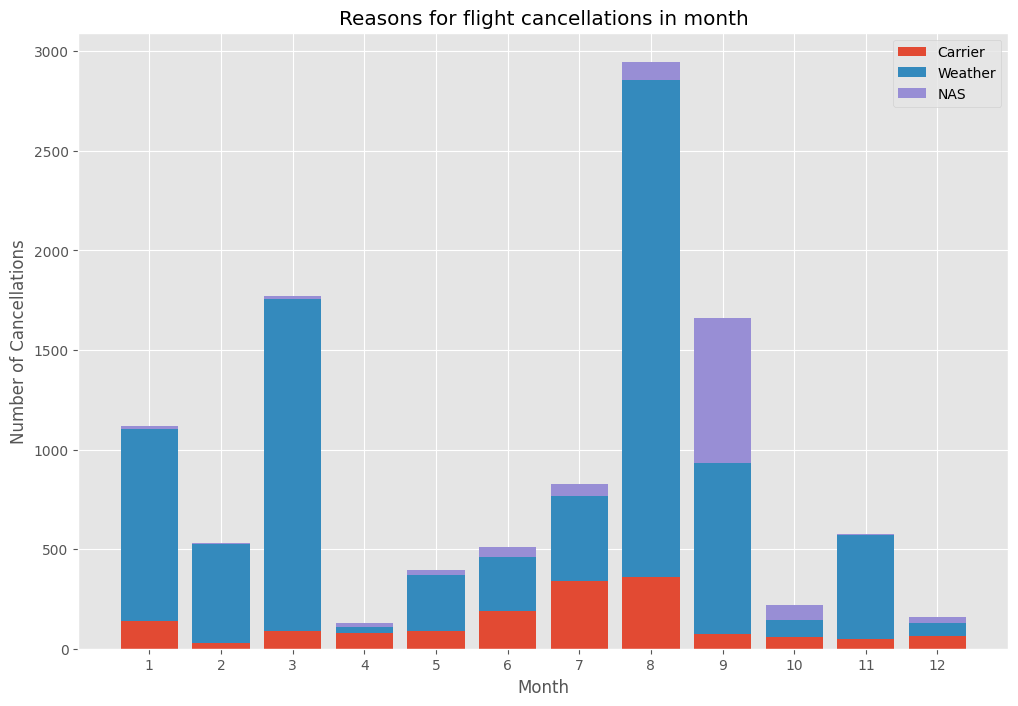

In [43]:
cancelled_group = cancelled['CANCELLATION_CODE'].groupby(cancelled['FL_DATE'].dt.month).value_counts().sort_index()

b_bottom = cancelled_group.loc[:,'A'].values
c_bottom = b_bottom + cancelled_group.loc[:,'B'].values
d_bottom = c_bottom + cancelled_group.loc[:,'B'].values

x = cancelled_group.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 0)

ax.bar(np.arange(len(x)),cancelled_group.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Reasons for flight cancellations in month')
plt.legend()
plt.show()


In [45]:
cancelled['ORIGIN'].value_counts()

ORIGIN
IAH    1836
EWR    1745
ORD    1195
SFO     492
BOS     453
       ... 
MAF       2
PVD       1
ELP       1
BGR       1
TUS       1
Name: count, Length: 110, dtype: int64

<Axes: title={'center': 'Top 20 destinations with the most cancellations'}, xlabel='Destinations', ylabel='Cancelled'>

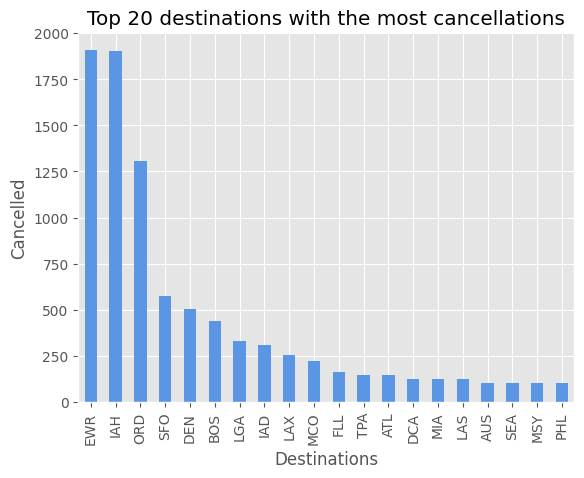

In [46]:
cancelled['DEST'].value_counts().head(20).plot(kind='bar', title='Top 20 destinations with the most cancellations', color='#5A96E3', ylabel='Cancelled', xlabel='Destinations')

<Axes: title={'center': 'Top 20 departure points with the most cancellations'}, xlabel='ORIGIN', ylabel='Cancelled'>

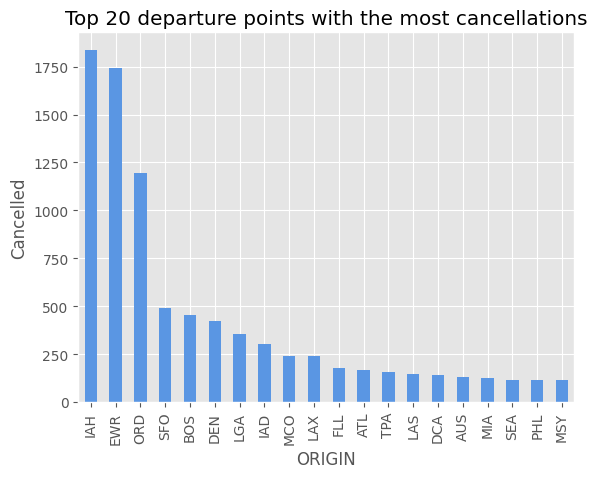

In [47]:
cancelled['ORIGIN'].value_counts().head(20).plot(kind='bar', title='Top 20 departure points with the most cancellations', color='#5A96E3', ylabel='Cancelled', xlabel='ORIGIN')

In [48]:
cancelled

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1650,2017-01-02,325,IAD,LAX,1715,0.0,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,1.0,A,0.0,332.0,0.0,0.0,2288.0,0.0,0.0,0.0,0.0,0.0
1748,2017-01-02,408,SFO,IAD,730,0.0,0.0,0.0,0.0,0.0,0.0,1519,0.0,0.0,1.0,A,0.0,289.0,0.0,0.0,2419.0,0.0,0.0,0.0,0.0,0.0
2360,2017-01-02,1125,IAH,EWR,1555,0.0,0.0,0.0,0.0,0.0,0.0,2020,0.0,0.0,1.0,A,0.0,205.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0
2761,2017-01-02,1803,SJU,EWR,158,0.0,0.0,0.0,0.0,0.0,0.0,503,0.0,0.0,1.0,A,0.0,245.0,0.0,0.0,1608.0,0.0,0.0,0.0,0.0,0.0
2807,2017-01-02,1844,SFO,ATL,2255,3.0,68.0,0.0,0.0,0.0,0.0,633,0.0,0.0,1.0,A,0.0,278.0,0.0,0.0,2139.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617516,2018-12-29,1482,STT,EWR,1525,1505.0,-20.0,0.0,0.0,0.0,0.0,1850,0.0,0.0,1.0,A,0.0,265.0,0.0,0.0,1634.0,0.0,0.0,0.0,0.0,0.0
620097,2018-12-31,2407,EGE,IAD,1600,0.0,0.0,0.0,0.0,0.0,0.0,2119,0.0,0.0,1.0,B,0.0,199.0,0.0,0.0,1573.0,0.0,0.0,0.0,0.0,0.0
620929,2018-12-31,992,EGE,ORD,1630,0.0,0.0,0.0,0.0,0.0,0.0,2010,0.0,0.0,1.0,B,0.0,160.0,0.0,0.0,1007.0,0.0,0.0,0.0,0.0,0.0
621173,2018-12-31,593,MTJ,EWR,1536,0.0,0.0,0.0,0.0,0.0,0.0,2148,0.0,0.0,1.0,B,0.0,252.0,0.0,0.0,1795.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_2009 = pd.read_csv('2009_UA.csv')
df_2010 = pd.read_csv('2010_UA.csv')
df_2011 = pd.read_csv('2011_UA.csv')
df_2012 = pd.read_csv('2012_UA.csv')
df_2013 = pd.read_csv('2013_UA.csv')
df_2014 = pd.read_csv('2014_UA.csv')
df_2015 = pd.read_csv('2015_UA.csv')
df_2016 = pd.read_csv('2016_UA.csv') 

In [ ]:
df_2009 = df_2009.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2010 = df_2010.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2011 = df_2011.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2012 = df_2012.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2013 = df_2013.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2014 = df_2014.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2015 = df_2015.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)
df_2016 = df_2016.drop(['Unnamed: 27', 'total_delay', 'OP_CARRIER'], axis=1)

In [ ]:
df = pd.concat([df, df_2011, df_2009, df_2010, df_2011,df_2012, df_2013, df_2014, df_2015, df_2016]).copy()

In [13]:
df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

In [14]:
df['labels'] = df['CARRIER_DELAY'] + df['WEATHER_DELAY'] \
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY']

In [15]:
df.loc[df['labels'] > 0,'labels'] = 2

In [16]:
df.loc[df['CANCELLED'] == 1,'labels'] = 1

In [17]:
df = df.loc[df['labels'] != 1]
df.loc[df['labels'] == 2,'labels'] = 1

In [25]:
# df.loc[df['labels'] == 2,'labels'] = 1

In [26]:
df[df['labels'] == 1]['labels']

1          1.0
2          1.0
8          1.0
11         1.0
12         1.0
          ... 
1943283    1.0
1943285    1.0
1943288    1.0
1943289    1.0
1943290    1.0
Name: labels, Length: 954468, dtype: float64

In [27]:
result = df[df['labels'] == 0]
result

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delay,labels
0,2017-02-06 00:00:00,1615,SFO,IAH,1250.0,1305.0,15.0,22.0,1327.0,1825.0,8.0,1835.0,1833.0,-2.0,0.0,0,0.0,225.0,208.0,178.0,1635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-06-11 00:00:00,1114,DEN,IAH,1010.0,1007.0,-3.0,12.0,1019.0,1315.0,7.0,1333.0,1322.0,-11.0,0.0,0,0.0,143.0,135.0,116.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-04-14 00:00:00,981,IAH,TPA,710.0,709.0,-1.0,16.0,725.0,1007.0,6.0,1018.0,1013.0,-5.0,0.0,0,0.0,128.0,124.0,102.0,787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017-08-19 00:00:00,1209,DEN,EWR,1346.0,1351.0,5.0,17.0,1408.0,1924.0,14.0,1945.0,1938.0,-7.0,0.0,0,0.0,239.0,227.0,196.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018-11-05 00:00:00,2381,ORD,SAN,1245.0,1240.0,-5.0,22.0,1302.0,1453.0,2.0,1507.0,1455.0,-12.0,0.0,0,0.0,262.0,255.0,231.0,1723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943277,2017-10-20 00:00:00,1058,EWR,LAX,1405.0,1357.0,-8.0,19.0,1416.0,1643.0,5.0,1704.0,1648.0,-16.0,0.0,0,0.0,359.0,351.0,327.0,2454.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943282,2018-09-20 00:00:00,1500,MCO,ORD,1442.0,1457.0,15.0,9.0,1506.0,1619.0,6.0,1637.0,1625.0,-12.0,0.0,0,0.0,175.0,148.0,133.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943284,2018-03-20 00:00:00,430,MSY,ORD,1219.0,1214.0,-5.0,7.0,1221.0,1422.0,6.0,1450.0,1428.0,-22.0,0.0,0,0.0,151.0,134.0,121.0,837.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943286,2018-01-27 00:00:00,219,ORD,HNL,930.0,929.0,-1.0,19.0,948.0,1501.0,3.0,1503.0,1504.0,1.0,0.0,0,0.0,573.0,575.0,553.0,4243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0 - không delay
1 - cancel
2 - delay

In [29]:
#df = df.rename(columns={'total_delay': 'labels'})

In [18]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [19]:
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY_OF_MONTH'] = df['FL_DATE'].dt.day
df['DAY_OF_WEEK'] = df["FL_DATE"].dt.day_of_week
df

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delay,labels,MONTH,DAY_OF_MONTH,DAY_OF_WEEK
0,2017-10-12,1108,ORD,SEA,746.0,739.0,-7.0,22.0,801.0,1008.0,11.0,1019.0,1019.0,0.0,0.0,0,0.0,273.0,280.0,247.0,1721.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,12,3
1,2018-11-14,673,BNA,IAD,1847.0,1841.0,-6.0,19.0,1900.0,2113.0,6.0,2118.0,2119.0,1.0,0.0,0,0.0,91.0,98.0,73.0,542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,14,2
2,2012-04-04,1244,EWR,TPA,1759.0,1810.0,11.0,56.0,1906.0,2136.0,6.0,2059.0,2142.0,43.0,0.0,0,0.0,180.0,212.0,150.0,997.0,11.0,0.0,32.0,0.0,0.0,43.0,1.0,4,4,2
3,2017-08-24,1165,EWR,LAX,1420.0,1419.0,-1.0,24.0,1443.0,1712.0,6.0,1725.0,1718.0,-7.0,0.0,0,0.0,365.0,359.0,329.0,2454.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,24,3
4,2017-12-15,2051,TPA,SFO,847.0,837.0,-10.0,12.0,849.0,1109.0,26.0,1147.0,1135.0,-12.0,0.0,0,0.0,360.0,358.0,320.0,2393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943286,2010-06-12,576,DEN,ORD,1453.0,1621.0,88.0,14.0,1635.0,1918.0,23.0,1822.0,1941.0,79.0,0.0,0,0.0,149.0,140.0,103.0,888.0,0.0,0.0,79.0,0.0,0.0,79.0,1.0,6,12,5
1943287,2015-07-14,243,DEN,GRR,1941.0,2102.0,81.0,28.0,2130.0,133.0,4.0,15.0,137.0,82.0,0.0,0,0.0,154.0,155.0,123.0,1015.0,0.0,0.0,1.0,0.0,81.0,82.0,1.0,7,14,1
1943288,2011-01-30,599,MDT,ORD,740.0,739.0,-1.0,23.0,802.0,850.0,9.0,839.0,859.0,20.0,0.0,0,0.0,119.0,140.0,108.0,594.0,0.0,0.0,20.0,0.0,0.0,20.0,1.0,1,30,6
1943289,2017-03-23,319,IAD,LAX,630.0,632.0,2.0,15.0,647.0,900.0,41.0,917.0,941.0,24.0,0.0,0,0.0,347.0,369.0,313.0,2288.0,0.0,0.0,24.0,0.0,0.0,24.0,1.0,3,23,3


In [20]:
df['Origin mean delay'] = df['total_delay'].groupby(df['ORIGIN']).transform('mean')
df['Origin mean distance'] = df['DISTANCE'].groupby(df['ORIGIN']).transform('mean')

df['Dest mean delay'] = df['total_delay'].groupby(df['DEST']).transform('mean')

#df['Origin cancellations'] = df['CANCELLED'].groupby(df['ORIGIN']).transform('mean')
#df['Dest cancellations'] = df['CANCELLED'].groupby(df['DEST']).transform('mean')

df['Origin TaxiOut'] = df['TAXI_OUT'].groupby(df['ORIGIN']).transform('mean')
df['Origin Arr delay'] = df['ARR_DELAY'].groupby(df['ORIGIN']).transform('mean')

df['Dest Arr delay'] =  df['ARR_DELAY'].groupby(df['DEST']).transform('mean')
df['Dest TaxiOut'] = df['TAXI_OUT'].groupby(df['DEST']).transform('mean')
df['Dest TaxiIn'] = df['TAXI_IN'].groupby(df['DEST']).transform('mean')
df['Dest Dep delay'] = df['DEP_DELAY'].groupby(df['DEST']).transform('mean')

df['Origin Dep delay'] = df['DEP_DELAY'].groupby(df['ORIGIN']).transform('mean')



In [21]:

df['ORIGIN'] = df['ORIGIN'].astype('category').cat.codes
df['DEST'] = df['DEST'].astype('category').cat.codes

In [32]:
df

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delay,labels,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,Origin mean delay,Origin mean distance,Dest mean delay,Origin TaxiOut,Origin Arr delay,Dest Arr delay,Dest TaxiOut,Dest TaxiIn,Dest Dep delay,Origin Dep delay
0,2017-07-23,244,49,84,620.0,607.0,-13.0,13.0,620.0,657.0,14.0,723.0,711.0,-12.0,0.0,0,0.0,123.0,124.0,97.0,588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,23,6,35.064831,1476.143849,33.121320,21.498268,29.969192,27.592242,19.851720,11.663571,28.455151,29.861326
1,2018-11-02,685,10,50,1100.0,1056.0,-4.0,12.0,1108.0,1256.0,7.0,1316.0,1303.0,-13.0,0.0,0,0.0,136.0,127.0,108.0,657.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,4,22.989566,922.325934,25.329394,17.539746,16.355720,19.081242,18.321632,8.047414,21.880991,20.785809
2,2018-02-28,342,118,37,1910.0,1906.0,-4.0,16.0,1922.0,2148.0,18.0,2157.0,2206.0,9.0,0.0,0,0.0,167.0,180.0,146.0,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,28,2,27.859229,1021.557400,35.109285,15.446488,22.030557,29.523809,21.012107,9.875234,32.685195,24.375455
3,2017-01-02,1481,29,60,550.0,547.0,-3.0,25.0,612.0,723.0,8.0,730.0,731.0,1.0,0.0,0,0.0,160.0,164.0,131.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0,28.856178,1046.051658,33.520715,18.618521,23.703774,28.811565,21.430168,13.633623,29.784902,26.045895
4,2018-05-10,2222,5,29,2010.0,2000.0,-10.0,15.0,2015.0,2058.0,5.0,2128.0,2103.0,-25.0,0.0,0,0.0,138.0,123.0,103.0,775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,10,3,23.093439,849.632376,26.520905,16.500855,16.244768,19.823960,18.214712,8.376258,23.334501,19.802511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943286,2018-03-30,1293,107,5,2355.0,2348.0,-7.0,20.0,8.0,502.0,5.0,522.0,507.0,-15.0,0.0,0,0.0,207.0,199.0,174.0,1504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,30,4,30.808480,1492.263531,21.985141,22.478294,26.618305,14.790974,20.433744,6.145930,20.371535,29.883884
1943287,2017-04-02,639,107,84,848.0,845.0,-3.0,15.0,900.0,1428.0,13.0,1503.0,1441.0,-22.0,0.0,0,0.0,255.0,236.0,208.0,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,6,30.808480,1492.263531,33.121320,22.478294,26.618305,27.592242,19.851720,11.663571,28.455151,29.883884
1943288,2015-07-08,1289,50,37,1015.0,1202.0,107.0,12.0,1214.0,1656.0,8.0,1455.0,1704.0,129.0,0.0,0,0.0,220.0,242.0,222.0,1400.0,107.0,0.0,22.0,0.0,0.0,129.0,1.0,7,8,2,27.592028,1106.716057,35.109285,19.964208,22.256351,29.523809,21.012107,9.875234,32.685195,26.458714
1943289,2011-05-11,566,84,4,1855.0,2152.0,177.0,32.0,2224.0,46.0,4.0,2149.0,50.0,181.0,0.0,0,0.0,114.0,118.0,82.0,606.0,0.0,0.0,4.0,0.0,177.0,181.0,1.0,5,11,2,36.403540,1028.530293,23.406279,22.812008,32.303306,16.501222,22.487550,9.237244,20.306447,34.249752


In [64]:
# #df = df.loc[df['labels'] != 1]
# df.loc[df['labels'] == 2,'labels'] = 1

In [35]:
#X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Dest TaxiOut', 'Dest Arr delay', 'Dest Dep delay', 'Origin TaxiOut', 'Origin Arr delay', 'Origin Dep delay']]
#', 'Origin TaxiOut', 'Origin Arr delay', 'Origin Dep delay', 'Origin mean delay'
X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Origin TaxiOut', 'Origin Arr delay', 'Origin Dep delay']]
y = df['labels']

In [66]:
# X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Origin mean distance',
#         'Origin mean delay', 'Origin cancellations','Dest cancellations', 'Origin TaxiOut', 'Origin Arr delay', 'Origin Dep delay', 'Dest mean delay', 'Dest Arr delay']]
# y = df['labels']

In [67]:
Z = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DISTANCE',
        'total_delay','TAXI_OUT','TAXI_IN', 'ARR_DELAY', 'DEP_DELAY', 'labels']]

<Axes: >

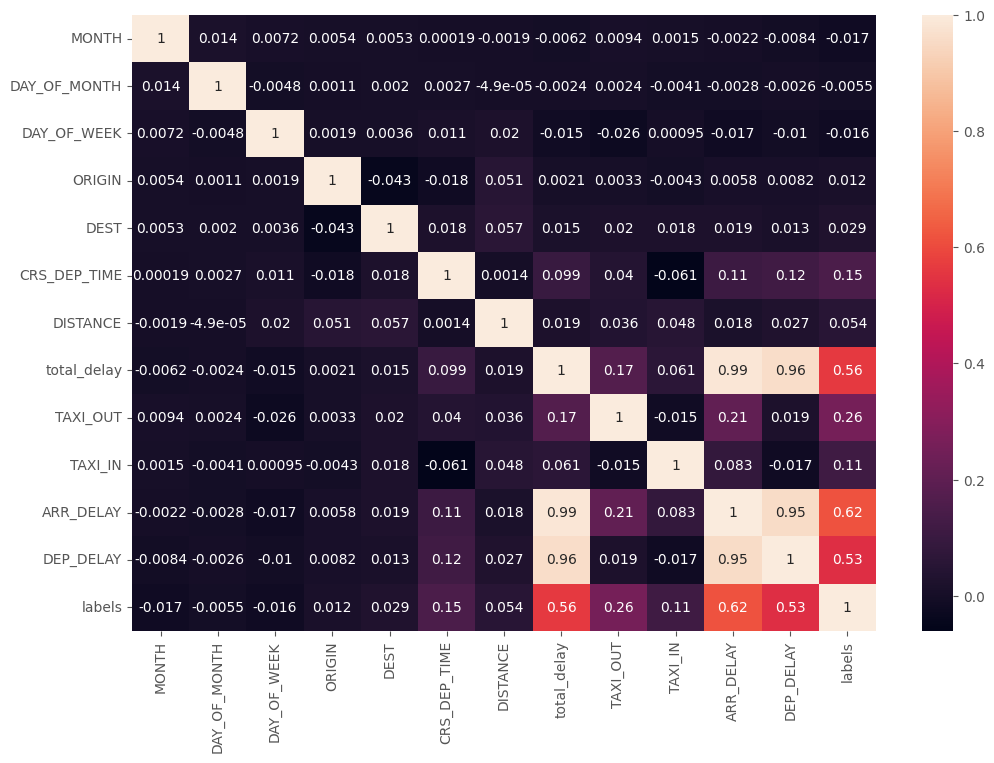

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(Z.corr(), annot=True)

DATA PREPROCESSING

In [35]:
X_cat = df[['ORIGIN','DEST','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']]
X_num = df[['CRS_DEP_TIME', 'DISTANCE', 'Dest TaxiIn', 'Dest TaxiOut', 'Dest Arr delay', 'Dest Dep delay', 'Dest mean delay']] 

In [44]:
# X_cat = pd.get_dummies(X_cat, drop_first=True)

In [45]:
# X_cat

,ORIGIN,DEST,MONTH,DAY_OF_MONTH,DAY_OF_WEEK
0,49,40,1,1,6
1,10,49,1,1,6
2,28,58,1,1,6
3,47,36,1,1,6
4,36,47,1,1,6
...,...,...,...,...,...
92836,49,58,12,31,5
92837,11,28,12,31,5
92838,106,81,12,31,5
92839,93,28,12,31,5


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['labels']

In [70]:
X.head()

,CRS_DEP_TIME,DISTANCE,Dest TaxiIn,Dest TaxiOut,Dest Arr delay,Dest Dep delay,Dest mean delay,ORIGIN,DEST,MONTH,DAY_OF_MONTH,DAY_OF_WEEK
0,-2.703828,0.711775,1.363763,-0.424274,0.322267,0.056188,0.384814,60,84,7,24,6
1,-1.450599,0.249940,-0.062178,-1.472698,-1.065594,-1.205687,-1.075054,37,50,7,17,0
2,-0.097681,-1.468517,0.067494,-1.545961,-0.944481,-0.926694,-0.851817,34,29,2,8,3
3,-1.287842,-1.232229,-1.065102,-0.325850,0.058743,0.253239,-0.045188,84,24,2,13,0
4,-1.298014,1.638131,0.658577,0.370830,0.637241,0.868122,0.757273,112,37,7,12,2


In [36]:
# import os
# n_cpu=os.cpu_count()
# print("The number of cpus: ",n_cpu)
# n_thread=n_cpu*2
# print("Expected number of threads:",n_thread)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_dt = DecisionTreeClassifier()
param={'criterion':['gini','entropy'],'min_samples_split':[5,10], 'max_depth':[None,2],'min_samples_leaf':[1,10],'max_features':[None,'sqrt','log2']}
GSDT = GridSearchCV(model_dt, param, cv=5, scoring='accuracy')
GSDT.fit(X_train, y_train)
print('best param:', GSDT.best_params_)
print('best score:', GSDT.best_score_)

best param: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5}
best score: 0.7781696994530416


In [40]:
pred = GSDT.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80    195918
         1.0       0.82      0.72      0.77    190568

    accuracy                           0.79    386486
   macro avg       0.79      0.79      0.79    386486
weighted avg       0.79      0.79      0.79    386486



In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42, n_estimators=10)

calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, y_train)

# y_predicted = calibrated_clf.predict(X_test)

# # y_predicted = clf.predict(X_test)
# # confusion = confusion_matrix(y_test, y_predicted)
# print(classification_report(y_test, y_predicted))

CalibratedClassifierCV(cv=5,
                       estimator=RandomForestClassifier(n_estimators=10,
                                                        random_state=42))

In [41]:
y_predicted = calibrated_clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81    195240
         1.0       0.82      0.77      0.80    191246

    accuracy                           0.80    386486
   macro avg       0.81      0.80      0.80    386486
weighted avg       0.81      0.80      0.80    386486



Text(0, 0.5, 'Fraction of positives')

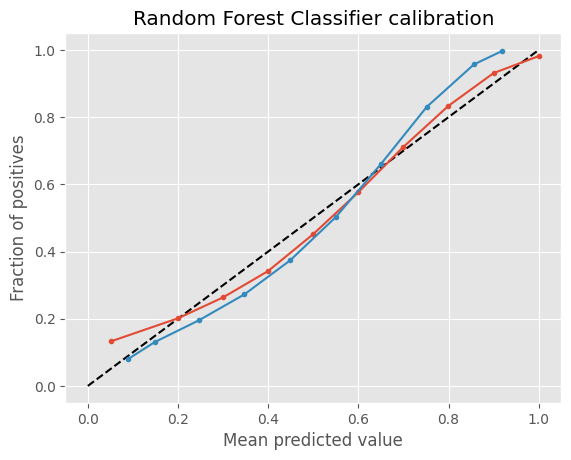

In [42]:
from sklearn.calibration import calibration_curve

from matplotlib import pyplot

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('Random Forest Classifier calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, 
                                 max_depth = 5, random_state=37)

calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, y_train)

y_predicted = calibrated_clf.predict(X_test)
print(classification_report(y_test, y_predicted))
#confusion = confusion_matrix(y_test, y_predicted)

# print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66    195240
         1.0       0.65      0.67      0.66    191246

    accuracy                           0.66    386486
   macro avg       0.66      0.66      0.66    386486
weighted avg       0.66      0.66      0.66    386486



Text(0, 0.5, 'Fraction of positives')

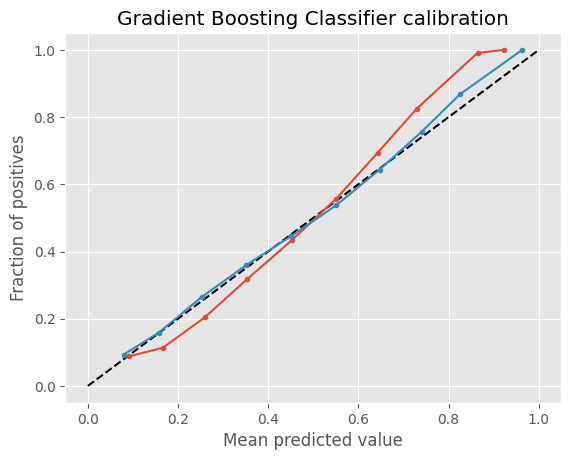

In [39]:
from sklearn.calibration import calibration_curve

from matplotlib import pyplot

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('Gradient Boosting Classifier calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
def uncalibrated(trainX, testX, trainy):
#create model
    clf = DecisionTreeClassifier(random_state=42).fit(trainX, trainy)
    y_predicted = clf.predict_proba(testX)[:, 1]
    return y_predicted
#y_predicted = clf.predict(X_test)
    #print(classification_report(y_test, y_predicted))

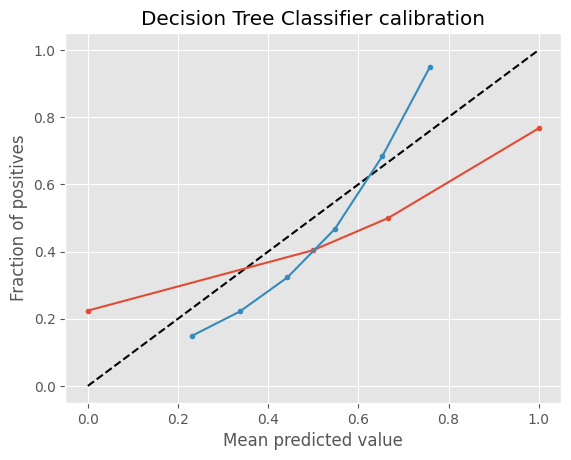

In [37]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot

clf = DecisionTreeClassifier(random_state=42)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')

calibrated_clf.fit(X_train, y_train)

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('Decision Tree Classifier calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

pyplot.show()

In [38]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, y_train)

y_pred = calibrated_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81    195240
         1.0       0.81      0.78      0.80    191246

    accuracy                           0.80    386486
   macro avg       0.80      0.80      0.80    386486
weighted avg       0.80      0.80      0.80    386486



In [39]:
X_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN,DEST,DISTANCE,Origin TaxiOut,Origin Arr delay,Origin Dep delay
793033,6,5,2,716.0,106,107,679.0,19.650199,25.420898,27.545066
1111638,9,13,1,1211.0,29,108,948.0,18.618521,23.703774,26.045895
1096789,8,19,6,1245.0,84,110,1250.0,22.812008,32.303306,34.249752
1452493,12,27,1,935.0,37,86,1023.0,25.407968,26.161032,29.309398
1236210,4,27,4,815.0,59,50,1222.0,19.864417,25.831177,27.872344
...,...,...,...,...,...,...,...,...,...,...
493985,1,2,2,1335.0,86,37,1023.0,17.079116,31.149390,34.142988
1850533,8,9,1,1807.0,50,60,1379.0,19.964208,22.256351,26.458714
473536,1,12,0,1646.0,107,57,2586.0,22.478294,26.618305,29.883884
494479,5,29,4,1910.0,48,50,3904.0,18.990373,22.617896,27.691330


In [44]:
y_pred

array([0.84259116, 0.1647841 , 0.55992369, ..., 0.30277069, 0.42159884,
       0.33785219])